# 1. Метрики классификации

Допустим, мы решаем проблему классификации, где целевая переменная $y_i$ принимает два значения: $y_i = \cases{1 \\ 0}$.

## 1.1 Accuracy (точность)

$$\Large MCE = Accuracy = \frac{1}{N}\sum_i^N(a_i=y_i) $$
$y_i$ - метка i-ого объекта, $a_i$ - результат алгоритма на i-ом объекте

Accuracy (точность) - естественный, простой и понятный функционал. Accuracy (точность) - это доля правильных ответов на всей выборке данных. 
**Недостаток** такого функционала очевиден: он очень плох в случае несбалансированной выборки, когда наблюдений из одного класса существенно больше, чем другого. В этом случае, наиболее оптимальная стратегия присваивать каждому объекту на тестовой выборке значение целевой переменной из большего класса. 

Например, в задаче выявлении редкого заболевания (например, рака), алгоритм, который будет классифицировать всех пациентов здоровыми, хоть и будет показывать высокое accuracy, будет абсолютно бесполезен. Показателен пример с выявлением женского рака груди: https://towardsdatascience.com/precision-recall-and-predicting-cervical-cancer-with-machine-learning-367221e70538. Здесь основная проблема заключается в том, что мы хотим снизить ошибку прогноза рака груди, если он действительно есть, а не когда его нет (а наш прогноз говорит, что есть). В этом случае accuracy плохая метрика, потому что она не учитывает ошибки I и II рода.

## 1.2 Confusion matrix 

Confusion matrix позволяет нам учесть ошибки I и II рода. 

![Example of confusion matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

Два класса разделены на положительный (обычно 1) и отрицательный (обычно 0 или -1). Объекты, которые алгоритм классифицирует как 1 называют ***Positive***, верные положительные **True Positive**, а неверные - **False Positive**. То же самое с отрицательным классом(***Negative***):

- TP = True Positive,
- TN = True Negative,
- FP = False Positive,
- FN = False Negative.

Я (и скорее всего не только я) использую такое простое правило, чтобы запомнить правильные ошибки: P или N (правая буква)- результат нашего предсказания, а T или F (буква слева) говорит нам о том, ошибаемся мы или нет.

**Заметка**. Иногда confusion matrix используется в транспонированной формеответы алгоритма связаны со строчками, а верность прогноза - по столбцам. То же самое и с классами - иногда положительный класс находится под отрицательным.

In [1]:
# Генерируем случайные значения для реальных значений классов и предсказанных: 
# y - real values, a - predicted
import numpy as np
y, a = np.concatenate([np.ones(35), np.zeros(65)]), \
       np.concatenate([np.ones(50), np.zeros(50)])

np.random.shuffle(y)
np.random.shuffle(a)

In [5]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cf_sklearn = confusion_matrix(y, a) # 1 - способ в sklearn 
cf_pandas = pd.crosstab(y,a) # 2 second - способ пандаса

# Calculate TN, FP, FN, TP: 
tn, fp, fn, tp = confusion_matrix(y,a).ravel()
display(cf_sklearn)
display(cf_pandas)

array([[33, 32],
       [17, 18]])

col_0,0.0,1.0
row_0,,
0.0,33,32
1.0,17,18


$$ \Large Accuracy = \frac{TN + TP}{TP + TN + FN + FP} = \frac{TN + TP}{n}$$
\
$$ \Large Ошибка \ I \ рода = \frac{FP}{TP + TN + FN + FP } = \frac{FP}{n}$$
\
$$ \Large Ошибка \ II \ рода = \frac{FN}{TP + TN + FN + FP} = \frac{FN}{n} $$

Заметим, что:

- |TN - TP| = |FP - FN|
- TP + TN + FP + FN = n

![](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-2.png)

**Recall** (*Sensitivity*, *True Positive Rate*, *Hit Rate*) отражает какую долю объектов (из всей выборки) положительного класса мы корректно предсказали:

$\Large TPR = \frac{TP}{TP + FN}$

**Precision** (*Positive Predictive Value*) отражает какую долю положительных объектов (нами предсказанных) оказались корректными:

$ \Large PPV = \frac{TP}{TP + FP} $

Отметим, что везде в числителе TP, а в знаменателе меняется лишь второе слагаемое.

**Проблема**: у нас должен быть некий компромисс между Precision и Recall, потому что довольно просто построить модель либо с высоким Precision, либо с Recall.

**Решение**: 

$\Large F_1 \ мера = \frac{2TP}{2TP + FP + FN} = \frac{2}{1/Precision + 1/Recall}$

$\Large F_\beta \ мера = \frac{1}{\alpha} \frac{Precision * Recall}{\alpha*Recall + (1-\alpha)*Precision} = (1+\beta^2)\frac{Precision * Recall}{Recall + \beta^2 * Precision}$

Если, например, precision очень мал, тогда рост recall даже в два раза,существенно не изменит значение F-меры. Посмотрим на графике ниже: если precision = 10%, $F_1$ не может быть превысить 20%.

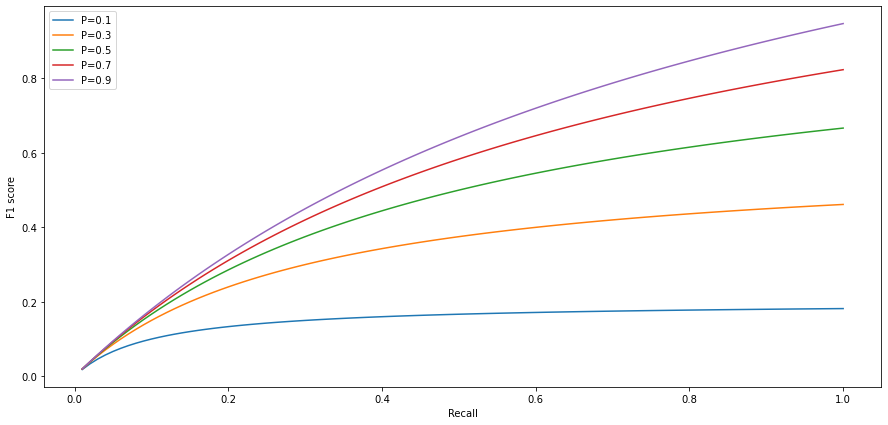

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
R = np.linspace(0.01,1, 100)
for p in [0.1, 0.3, 0.5, 0.7, 0.9]:
    f1_score = 2/(1/p + 1/R)
    plt.plot(R, f1_score)
    plt.legend(["P=0.1", "P=0.3", "P=0.5", "P=0.7", "P=0.9"])
plt.xlabel("Recall")
plt.ylabel("F1 score")
plt.show()

Рассмотрим еще одну метрику качества: Specificity или TNR - True Negative Rate:
$$ \Large TNR = Specificity = \frac{TN}{TN + FP} $$

процент корректно предсказанных объектов отрицательного класса (по всей выборке). Recall зачастую называют Sensitivity и используют в паре со specificity для оценки качества модели, и также часто усредняют. Обе метрики обозначают процент верно предсказанных объектов какого-либо из двух классов:

$$ \Large R_1 = R = Sensitivity $$
$$ \Large R_0 = Specificity $$

Также запомним, что False Positive Rate (FPR, fall-out, false alarm rate):

$$ \Large FPR = \frac{FP}{TN + FP} = 1 - TPR = 1 - Specificity$$

доля объектов отрицательного класса, которые были ошибочно отнесены к положительному классу (это важно помнить для понимания кривой ROC AUC).

## 1.3 ROC AUC - receiver operating characteristic area under curve

Площадь под ROC кривой одна из наиболее популярных метрик качества задачи  бинарной классификации:

![](https://miro.medium.com/max/576/1*MIQXB9LDkPoHunwEXOa8Cg.png)
![](https://i.stack.imgur.com/jdCh5.png)

The AUC-ROC есть ряд интерпретация. Например, это
вероятность, что случайно выбранный положительный объект появится позже 
случайно выбранного отрицательного объекта в отранжированном списке результатов классификатора.

Наиболее простой способ вычисления: отсортируем выборку в порядке возрастания по вероятности. Тогда:

$\Large AUC =  1 -  \frac{1}{N * P}\sum_{i<j}(y_i > y_j)$

Accuracy 0.9521276595744681


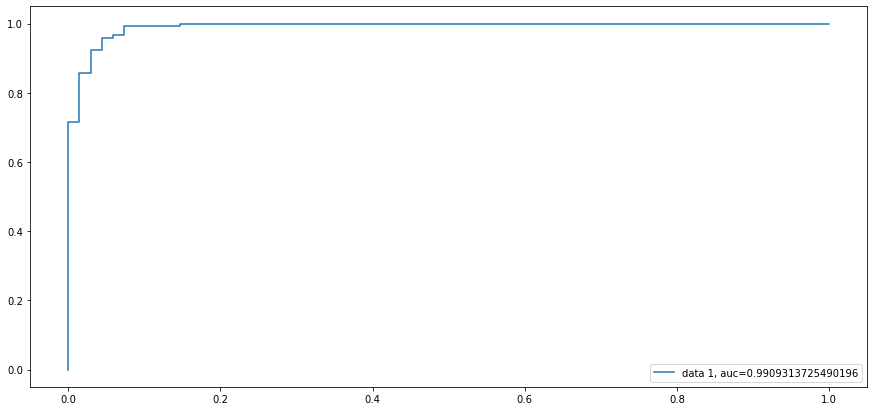

In [7]:
# Breast cancer ROC AUC 
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,7]

# Data
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# CV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

# Model 
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
list(zip(thresholds, fpr, tpr))

[(1.999508687347852, 0.0, 0.0),
 (0.999508687347852, 0.0, 0.008333333333333333),
 (0.9532906527627574, 0.0, 0.7166666666666667),
 (0.9513445717895306, 0.014705882352941176, 0.7166666666666667),
 (0.8678516298270084, 0.014705882352941176, 0.8583333333333333),
 (0.8639235078693217, 0.029411764705882353, 0.8583333333333333),
 (0.7240783831888962, 0.029411764705882353, 0.925),
 (0.7042596039298377, 0.04411764705882353, 0.925),
 (0.5810651085624284, 0.04411764705882353, 0.9583333333333334),
 (0.5161884309384814, 0.058823529411764705, 0.9583333333333334),
 (0.42908394620719026, 0.058823529411764705, 0.9666666666666667),
 (0.41126332872346555, 0.07352941176470588, 0.9666666666666667),
 (0.21504423521520422, 0.07352941176470588, 0.9916666666666667),
 (0.054741074097264385, 0.14705882352941177, 0.9916666666666667),
 (0.049869480941454374, 0.14705882352941177, 1.0),
 (1.7864086510193157e-24, 1.0, 1.0)]

In [27]:
np.round(y_pred_proba, 3)

array([0.04 , 0.   , 0.881, 0.   , 0.581, 0.65 , 0.997, 0.796, 0.026,
       0.996, 0.864, 0.956, 0.004, 0.213, 0.997, 0.974, 0.991, 0.002,
       0.018, 0.999, 0.999, 0.926, 0.999, 0.951, 0.694, 0.312, 0.988,
       0.97 , 0.   , 0.999, 0.995, 0.997, 0.967, 0.998, 0.965, 0.996,
       0.958, 0.999, 0.999, 0.969, 0.934, 0.947, 0.   , 0.896, 0.98 ,
       0.901, 0.986, 0.995, 0.985, 0.   , 0.961, 0.996, 0.999, 0.01 ,
       0.868, 0.   , 0.077, 0.986, 0.995, 0.86 , 0.987, 0.968, 0.999,
       0.   , 0.977, 0.   , 0.   , 0.89 , 0.   , 0.   , 0.005, 0.999,
       0.   , 0.97 , 0.979, 0.   , 0.001, 0.995, 0.   , 0.798, 0.987,
       0.859, 0.663, 0.993, 0.998, 0.   , 0.998, 0.986, 0.998, 0.   ,
       0.999, 0.991, 0.998, 0.966, 0.994, 0.954, 0.   , 0.999, 0.997,
       0.   , 0.999, 0.   , 0.   , 0.856, 0.   , 0.999, 0.951, 0.   ,
       0.   , 0.91 , 0.037, 0.   , 0.001, 0.001, 0.724, 0.999, 0.93 ,
       0.969, 0.97 , 0.411, 0.   , 0.873, 0.06 , 0.   , 0.   , 0.   ,
       0.   , 0.989,

In [13]:
y_sort_test = y_test[np.argsort(y_pred_proba)]
y_sort_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
sum_ = 0
for i in range(y_sort_test.shape[0]):
    for j in range(y_sort_test.shape[0]):
        if (i < j) & (y_sort_test[i] > y_sort_test[j]):
            sum_ += 1
from collections import Counter
Counter(y_test)
print(f"ROC AUC = {1 - 1/(68*120)*sum_}")

ROC AUC = 0.9909313725490196


In [29]:
# Положительные объекты в выборке
P = (y_test==1).sum()
# Отрицательные объекты
N = (y_test==0).sum()
y_ij = 0
y_test_sorted = y_test[np.argsort(y_pred_proba)]
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[0]):
        if i<j:
            if y_test_sorted[i]>y_test_sorted[j]:
                print(i)
                print(y_test_sorted[i], y_test_sorted[j])
                y_ij += 1
                
print(y_ij)
auc_hand = 1-1/(P * N)*y_ij
print(f"auc  = {auc_hand}")

58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
58
1 0
64
1 0
64
1 0
64
1 0
64
1 0
64
1 0
65
1 0
65
1 0
65
1 0
65
1 0
65
1 0
66
1 0
66
1 0
66
1 0
66
1 0
66
1 0
68
1 0
68
1 0
68
1 0
68
1 0
70
1 0
70
1 0
70
1 0
71
1 0
71
1 0
71
1 0
72
1 0
72
1 0
72
1 0
73
1 0
73
1 0
73
1 0
75
1 0
75
1 0
76
1 0
76
1 0
77
1 0
77
1 0
78
1 0
78
1 0
79
1 0
79
1 0
80
1 0
80
1 0
81
1 0
81
1 0
82
1 0
82
1 0
84
1 0
85
1 0
86
1 0
87
1 0
88
1 0
89
1 0
90
1 0
91
1 0
92
1 0
93
1 0
94
1 0
95
1 0
96
1 0
97
1 0
98
1 0
99
1 0
100
1 0
74
auc  = 0.9909313725490196


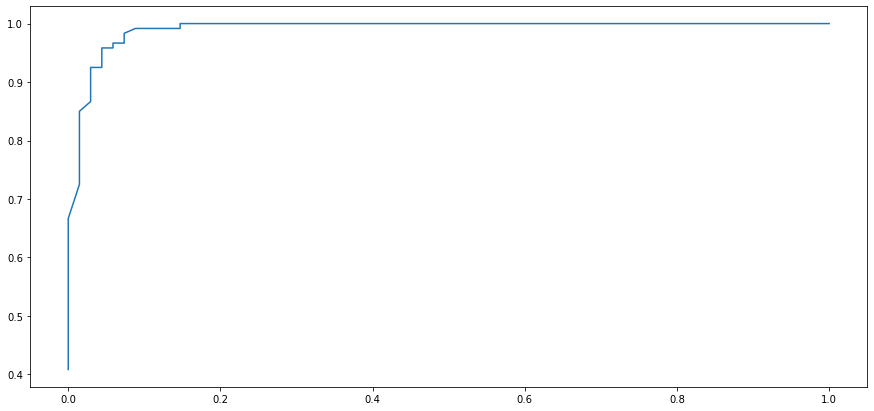

In [31]:
# ROC AUC для разных порогов вручную
score = y_pred_proba.copy()
y = y_test.copy()

# FPR
fpr = []
# TPR
tpr = []
# Пороги через 0.01 от о до 1 
thresholds = np.arange(0.0, 1, .01)

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# Цикл по всем порогам; определяем долю TP и FP при данных порогах
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(score)):
        if (score[i] > thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))
plt.figure(figsize = (15,7))
plt.plot(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# 2. Метрики для регрессии

In [33]:
y_reg = np.random.normal(loc = 5, scale = 10, size = 1000)
a_reg = np.random.normal(loc = 5, scale = 11, size = 1000)

## 2.1 MAE, MSE, RMSE, R^2

- **MAE** - mean absolute error

- **MSE** - mean squared error

- **RMSE** - root of mean squared error and 


- **R^2** - determination coefficient 

$$ \Large MAE = \frac{1}{N}\sum_i^N|a_i - y_i|$$

$$ \Large MSE = \frac{1}{N}\sum_i^N(a_i - y_i)^2 $$ 

$$ \Large RMSE = \sqrt{\frac{1}{N}\sum_i^N(a_i - y_i)^2} $$

$$ \Large R^2 = 1 - \frac{\sum_i^N(a_i - y_i)^2}{\sum_i^N(y_i - \bar{y})^2} $$

$$ \Large EVS = 1 - \frac{D(y|x)}{D(y)} $$

MSE, RMSE имеют довольно понятный вид, но их значения довольно сложно интерпретировать. 
В этом случае для интерпретации результатов лучше использовать коэффициент детерминации: MSE делится на MSE оптимального константного алгоритма (предсказываем все целевые значение как средние). 

Коэффициент детерминации измеряется от 0 до 1, но может быть меньше нуля, если решения алгоритма хуже константного.

EVS (eplained variance score) - коэффициент объясненной дисперсии. На самом деле в эконометрике именно он и назвается коэффициент детерминации $R^2$. Напомню, что это 1 минус отношение дисперсии ошибки (условная дисперсия) к дисперсии целевой переменной (безусловная).

Заметим, что несмотря на тот факт, что минимальные значения MSE, RMSE и максимум R2 достигается в одной точке, на практике при оптимизации (например, метод градиентного спуска), эти функционалы не эквивалентны, поскольку имеют разные производные. Также заметим, что  MAE не стремится к нулю в случае минимизации (сравнительно например с MSE).




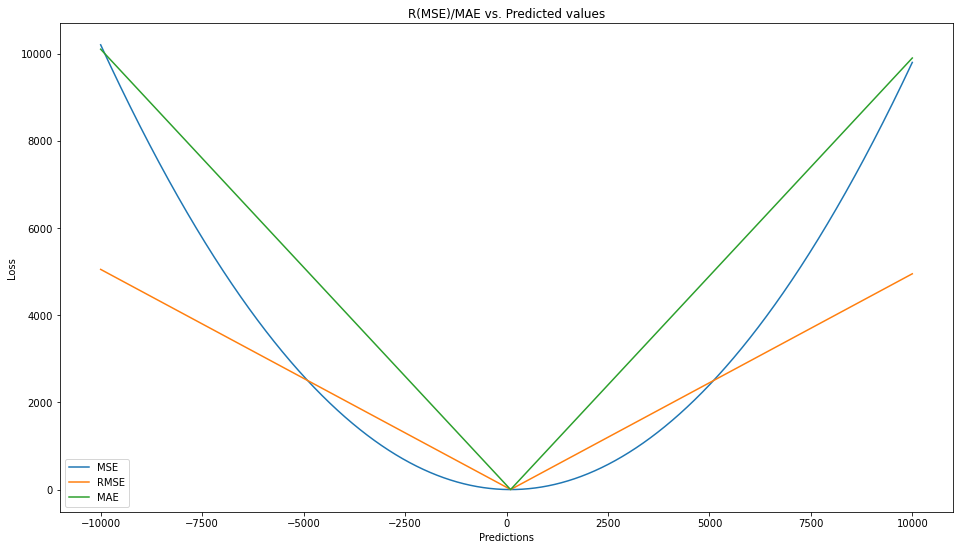

In [59]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))
def rmse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sqrt(np.sum((true - pred)**2))


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,1, figsize = (16,9))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i])/1e4 for i in range(len(pred))]
loss_rmse = [rmse(target[i], pred[i])*0.5 for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mse, label = "MSE")
ax1.plot(pred, loss_rmse, label = "RMSE")
ax1.plot(pred, loss_mae, label = "MAE")
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("R(MSE)/MAE vs. Predicted values")
ax1.legend();

## 2.2 MAPE and SMAPE

Это функции ошибки в процентах:

- **MAPE** - Mean Absolute Percentage Error:
$$ MAPE = 100\% * \frac{1}{N}\sum_i^N\frac{y_i - a_i}{y_i} $$

- **SMAPE** - Symmetric Mean Absolute Percentage Error:

$$ SMAPE = 100\% * \frac{1}{N}\sum_i^N\frac{y_i - a_i}{(y_i + a_i)/2}$$

Выглядят такие функции ошибки довольно логично: делим абсолютную разницу между ответами алгоритма и истинным значением на их среднее в случае SMAPE или истинное значение в случае с MAPE. 

SMAPE более предпочтителен в качестве ошибки, но менее интерпретируем. Он позволяет избежать проблемы, когда значения целевой переменной равняется 0 или же когда ответ алгоритма совпадает с истинным значением.

Однако, когда у нас целевая переменная часто принимает нулевые значения, фокусирование на SMAPE приводит нас к тому, что мы пытаемся угадать 0. Здесь же возникает проблема с интерпретацией результатов: попробуйте объяснить бизнесу во сколько процентов 2 больше 0.

The SMAPE and MAPE часто используют при предсказании временных рядов, особенно финансовых. Представим ситуацию, что вместо цены на акцию в 1 единицу мы предсказываем 2 единицы и место 101 предсказываем 102. В первом случае мы ошибаемся почти в 2 раза и почти угадываем во втором случае. Тем не менее, MAE в обоих случаях будет равнятся 1, а SMAPE будет различаться сильно.

In [66]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape_vectorized_v2(a, y): 
    mask = a != 0
    return (np.fabs(a - y)/a)[mask].mean()

def smape(a, y):
    return 100/len(a) * np.sum(2 * np.abs(y - a) / (np.abs(a) + np.abs(f)))

https://scikit-learn.org/stable/modules/model_evaluation.html

# 3. Кросс-валидация

Кросс-валидация обычно используется для подбора гиперпараметров модели (количество соседей, коэффициент регуляризации в регрессии и т.д.). Как уже говорилось раннее, задача специалиста по машинному обучению подобрать модель так, чтобы она давала хорошую точность на *новых данных*. Поэтому, чтобы избежать проблему переобучения модели, используют кросс-валидацию.

Кросс-валидация - это процедура, которая позволяет получать оценки параметров модели на разных выборках. В этом случае мы можем посмотреть, насколько хороошо наша модель предсказывает значения целевой переменной не на одной выборке, а на нескольких (обычно независимых). Таким образом, мы получаем более точные оценки *out-sample*.
    
    Почему кросс-валидация так важна?

    Обычно мы делим наш датасет на тренировочную и тестовую выборку. Тренировочная выборка используется для обучения модели, а качество прогноза смотрим на независимой тестовой выборке.
    Однако, разбиение датасета на трейн и тест подразумевает некоторый тип случайности, от которого в конечном счете тоже будет зависеть точность нашего предсказания. Соответственно, данный элемент случайности нужно как-то снизить, предварительно оценив модель на разном количестве подвыборок.

## 3.1  Leave p out cross-validation

Leave p-out cross-validation (LpOCV) метод всесторонней кросс-валидации, который использует $p$ наблюдение для тестовой выборки, а остальные наблюдения используются для подгонки модели. Данный процесс повторяется до тех пор, пока мы не пройдемся по всей выборке.

Вариант LpOCV с $p=2$ известен как leave-pair-out cross-validation обычно рекомендуют как близкий к несмещенному методу для оценивания ROC AUC в задаче бинарной классификации.

In [5]:
import numpy as np
from sklearn.model_selection import LeavePOut
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
lpo = LeavePOut(2)
lpo.get_n_splits(X)

print(lpo)

for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

LeavePOut(p=2)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 1] TEST: [2 3]


## 3. 2 Leave-one-out cross-validation

Leave-one-out cross-validation (LOOCV) это частный случай Leave p-out cross-validation (LpOCV) с $p=1$. Такие типы кросс-валидации используют все наблюдения выборки в качестве тестовой.

**Плюсы:**

- Просто, легко для понимания и внедрения

**Минусы:**

- Возможно небольшое смещение
- Вычислительно затратно

![](https://miro.medium.com/max/300/1*26vyRHpqGbVAwJq_csUqZQ.gif)

In [6]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

LeaveOneOut()
TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


## 3.3 Holdout cross-validation

Отложенная кросс-валидация предполагает случайное разбиение на тестовую и тренировочную выборки. Обычно тренировочная выборка в 1.5-2 раза больше, чем тестовая. На тренировочной выборке мы оцениваем параметры модели, а на тестовой - проверяем качество.

**Плюсы:**
- Как и в предыдущих методах

**Минусы:**
- Не подходит для несбалансированных выборок
- Большое объем данных не используется для оценивания параметров модели

![](https://miro.medium.com/max/367/1*kUcJBJmkSUbmkO0tm_rdyg.png)

In [7]:
from sklearn.model_selection import train_test_split

## 3.4 k-fold cross-validation:

![](https://miro.medium.com/max/350/1*2rRcNnIokzJU_-NXm29IMA.gif)

В k-fold кросс-валидации, исходные датасет разбивается на $k$ равных частей или "фолдов". Соответственно, мы оцениваем $k$ моделей, каждый раз смотрим качество на тесте и усредняем наши метрики.

LOOCV это частный случай k-fold кросс-валидации с $k=n$.

![](https://miro.medium.com/max/382/1*ZAtq4R-CnEoACJQ4HJ6YwQ.png)

**Плюсы:**
- У модели низкое смещение
- Не так затратно по сравнению с LOOCV
- Используется весь датасет для подгонки модели

**Cons:**
- Не подходит для несбалансированных выборок.

In [8]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5,6]])
y = np.array([1, 2, 3, 4, 5])
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1 2 3 4] TEST: [0]
TRAIN: [0 2 3 4] TEST: [1]
TRAIN: [0 1 3 4] TEST: [2]
TRAIN: [0 1 2 4] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]


## 3.5 Repeated random subsampling validation

Повторная случайная 
Метод повторного случайного разбиения еще назыывают кросс-валидацией Монте-Карло, при которой мы случайно разбиваем датасет на тренировочную и тестовую выборки. Однако, при этом длина разбиения зараннее неизвестна. Количество итераций не фиксированно и определяется каждым самостоятельно.

**Плюсы:**
- Доля тренировочной и тестовой выборок не зависит от количества итераций

**Минусы:**
- Некоторые наблюдения могут быть не выбраны.
- Не подходит для несбалансированных выборок.

![](https://miro.medium.com/max/620/1*MiLCGYdMlPkjd6OB5v_4ag.png)

In [9]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=17)
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## 3.6 Stratified k-fold cross-validation:

Все предыдущие методы кросс-валидации плохо справляются с проблемой несбалансированной выборки. Данный способ позволяет решить данную проблему.

При таком разбиении, датасеты на каждом из $k$ фолдов разбивается таким образом, чтобы доля наблюдений для значений целевой переменной была всегда в одной пропорции. Например, если в исходном датасете у нас 20% налюдений для $y=1$, то в Stratified k-fold кросс-валидации на любом фолде доля наблюдений с $y=1$ будет всегда 20%.

**Плюсы:**
- Решает проблему несбалансированности выборки.

**Минусы:**
- Не подходит для временных рядов.

![](https://miro.medium.com/max/297/1*heFAp1evlvrI_1MGHgvB8w.png)



In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [5,6], [7,8], [9,10], [11,12], [13,14]])
y = np.array([0, 0, 0, 0, 1, 1, 1,1,1])
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)

print(skf)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [2 3 5 6 7 8] TEST: [0 1 4]
TRAIN: [0 1 3 4 7 8] TEST: [2 5 6]
TRAIN: [0 1 2 4 5 6] TEST: [3 7 8]


## 3.7 Time Series cross-validation:


В случае временных рядов порядок наблюдений всегда имеет значение, поэтому предыдущие способы кросс-валидации не подходят. В данной ситации разбиение на тренировочную и тестовую выборки происходит вперед идущим методом. Пример представлен на картинке ниже: здесь мы оцениваем модель на серых наблюдениях и предсказываем на оранжевых.

![](https://miro.medium.com/max/552/1*c99ETyWfeteaC_564CDnLw.png)



In [11]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


# 4. Подбор гиперпараметров

## 4.1 Grid search

Метод подбора гиперпараметров по сеткте дискеритизрован и суммарное количество вариантов гиперпараметров - это картезианское произведение всех возможных вариантов. В данном случае мы оцениваем такое количество моделей, равно суммарному числу вариантов всех комбинаций из гиперпараметров. Заметим, что несмотря на то, что данная процедура распараллеливается (подключаются к вычислению все ядра процессора), такой метод страдает от проклятия размерности - экспоненциальный рост количества всех возможных вариантов.

In [32]:
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'n_neighbors':np.arange(1, 10)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(iris.data, iris.target)


dict(zip(clf.cv_results_['param_n_neighbors'].data, 
         clf.cv_results_['rank_test_score']))

{1: 8, 2: 9, 3: 6, 4: 3, 5: 3, 6: 1, 7: 1, 8: 6, 9: 3}

## 4.2 Random search


Одна из разновидностей предыдущего алгоритма, в которой пространство поиска выбирается случайным образом вместо того, чтобы дискретизировать его с помощью декартовой сетки. Однако, данный алгоритм в теории бесконечен. Вместо количества гиперпараметров мы задаем лимит времени (другими словами, количество попыток). Отметим, что этот алгоритм также страдает от проклятия размерности. Одним из преимуществ случайной сетки является то, что если два гиперпараметра слабо коррелированы, такой способ позволяет более точно найти оптимум каждого параметра, как показано на рисунке ниже.

A variation of the previous algorithm, which randomly samples the search space instead of discretizing it with a Cartesian grid. The algorithm has no end. Instead a time budget has to be specified (in other words, a number of trials). This algorithm suffers likewise from the curse of dimensionality to reach a preset fixed sampling density. One of the advantages of random search is that if two hyper-parameters are little correlated, random search enables to find more precisely the optima of each parameter, as shown on the figure below.

![](https://miro.medium.com/max/700/0*xYiH3bc5hh1DTrFR.jpeg)

## 4.3 Parameter Sampler

Генератор гиперпараметров из заданного распределения. Если все гиперпараметры представлены в виде списка, то используется сэмплирование без повторения. Если по крайней мере один гиперпараметр задан как распределение, используется сэмплирование с повторением. Рекомендуется использовать для непрерывных распределений непрерывных гиперпараметров.

In [33]:
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import expon
import numpy as np
rng = np.random.RandomState(0)
param_grid = {'a':[1, 2], 'b': expon()}
param_list = list(ParameterSampler(param_grid, n_iter=4,
                                    random_state=rng))
rounded_list = [dict((k, round(v, 6)) for (k, v) in d.items())
                 for d in param_list]
rounded_list == [{'b': 0.89856, 'a': 1},
                  {'b': 0.923223, 'a': 1},
                  {'b': 1.878964, 'a': 2},
                  {'b': 1.038159, 'a': 2}]

True

## 4.4 Parameter grid 

Смесь 3 и 1 типа выбора параметров.

In [34]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid)) == (
    [{'a': 1, 'b': True}, {'a': 1, 'b': False},
     {'a': 2, 'b': True}, {'a': 2, 'b': False}])

True

In [ ]:
grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(grid)) == [{'kernel': 'linear'},
                              {'kernel': 'rbf', 'gamma': 1},
                              {'kernel': 'rbf', 'gamma': 10}]

ParameterGrid(grid)[1] == {'kernel': 'rbf', 'gamma': 1}

# Практика 

https://github.com/FUlyankin/mlcourse.ai/blob/master/jupyter_russian/topic04_linear_models/lesson4_practice_alice_benchmarks.ipynb